In [ ]:
# CNN ( comvolution neural network ) --> 망을 깊게하는 그런 과정을 파악하는 것이 중요하다 ( 깊게 하기 위해 머리를 쓰는 것이 중요)

# -> pixel 의 주변을 적분한다 
# -> filter, padding, stride, con2D 이용
##  ( 필터의 사이즈가 중요하다 -> 필터사이즈가 크면 큰 특징을, 작게하면 작은 특징을 뽑아낸다 ) 
# -> pooling 이용 

#VGG ( 망을 깊게 함 ) 

#Inception : 망을 깊게하기전에 수평으로 늘어뜨렸다.  ( inception 늘여뜨려보니 정확해져간다. )  

# image generator : 이미지 증강을 한다. ( 이미지 부족 문제를 해결해준다 ) <- 전이학습도 데이터 부족문제를 해결한다 ( transduction ) 


# static mode ( 모델 다 만들고나서 마지막에 실행시켜봐야 어떤 데이터가 있는지 그떄서야 확인 가능하다 ) 
# dynamic mode ( = graph mode, static mode 와 다르게 데이터확인할 수 있으나 속도는 static mode 를 따라잡진 못한다 ) 

# efficientNet(필터사이즈, 깊이) , ResLet


In [ ]:
# K.set_image_data_format('channels_first') # chaccels_last

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols=28,28
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [3]:
print('X_train shape : {}'.format(X_train.shape))
print('X_train samples : {}'.format(X_train.shape[0]))
print('X_test samples : {}'.format(X_test.shape[0]))

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)

X_train shape : (60000, 28, 28, 1)
X_train samples : 60000
X_test samples : 10000


In [ ]:
model = Sequential()
# output : 32, (3,3) : 필터 사이즈
# 28x28 => (128,26,26,32)
# same(28,28) : 모서리 특징 포함
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
# Conv2D(32, (3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu')

# (128,24,24,64)
# (128,12,12,64)
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())# 12x12x64 => 1차원

# FFNN , FC(fully-connected)
model.add(Dense(128,activation='relu'))# 9216x128
# # 128x128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation='softmax'))# 128x10
# 128x10

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# epoch마다 accuracy를 저장
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩(재정의)
    def on_train_begin(self, logs={}): # 훈련시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))
        
history = AccuracyHistory()

# 트레인, test
# train, validation_data
hist = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(X_test,Y_test), callbacks=[history])
score = model.evaluate(X_test,Y_test,verbose=0)

In [ ]:
model.summary()

In [ ]:
history.on_train_begin()
hist.history['accuracy']

In [ ]:
image = X_train[0,:,:,0]
plt.imshow(image, cmap=plt.cm.Greys)


In [ ]:
plt.plot(range(1,13), hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# 모델 저장 / 로딩

In [ ]:
# HDFS(hadoop file system) : 모델 구조 전체가 저장
# 가중치, 구조, optimization state등이 저장
# jsom으로 저장, 구조 , 가중치를 별도로 저장 => web에서 tensorflow 지원
# tensorflow.js import  : web에서도 가능
model.save('model_mnist.h5')
print('모델이 저장되었습니다.')

from keras.models import load_model

model = load_model('model_mnist.h5')
print('모델이 로딩되었습니다.')

model.summary()

In [ ]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
l1.name
l1.input_shape
l1.activation
l1.output_shape

In [ ]:
# imageDataGenertor


In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)
# datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
#datagen = ImageDataGenerator(zca_whitening =True)           #>>>>>>>>>>     이미지 백색화 시키는법 -> noise 제거 (변수간 상관도를 없앤다 ( 즉 이미지의 pca 라고 생각하자 ))

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
    save_to_dir = 'images', save_prefix='aug', save_format='png'):   # 코드의미 : images 폴더에 저장됐는데 증강이 됐다 -> augment = 증강됐다. 
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break    

In [ ]:
from keras.datasets import cifar10       # cifar10 은 10개로 구성 (airplane, automobile, bird,cat,deer, dog,frog,horse,ship,truc 분류문제)
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Dense, Dropout,Flatten, Activation
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.reset_default_graph()

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('X_train shape : {}'.format(X_train.shape))
print('X_train shape : {}'.format(X_train.shape[0]))
print('X_test shape : {}'.format(X_test.shape[0]))

NB_CALSSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CALSSES)
Y_test = np_utils.to_categorical(Y_test, NB_CALSSES)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
Y_train.shape

In [ ]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [ ]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [ ]:
model = Sequential()
# residual 망의 영향  (conv를 2번 하고 나서 pooling 을 해주면 residual 의 영향을 받아서 더 좋다 ) -> 망을 더 깊게하기 때문이다

 #input=32x32x3(=칼라) -> 가중치 = 32x32x32 
model.add(Conv2D(32,kernel_size = 3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))

model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [ ]:
model.add(Conv2D(64,kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs=NB_EPOCH, validation_split = VALIDATION_SPLIT, verbose=VERBOSE)

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
score

In [ ]:
datagen = ImageDataGenerator( # 똑같은 데이터  : Random 순서
featurewise_center=False,
samplewise_center = False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False, # 이미지 PCA 노이즈 제거
rotation_range=0,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip = True,
vertical_flip=False)
datagen.fit(X_train)

In [ ]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                    samples_per_epoch=X_train.shape[0], nb_epoch=NB_EPOCH, verbose=VERBOSE)
print('Test score : {}'.format(score[0]))
print('Test accuracy : {}'.format(score[1]))

In [ ]:
# json
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h2', overwrite=True)

In [ ]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h2')
print('Loded model from disk')

In [ ]:
# 문제 accuracy graph 출력
# 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측해 보시요

In [ ]:
# plt.imshow(history.history['accuracy'])
# plt.title('Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.show()

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accruacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json

img_names = ['cat.jpg','dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32') for img_name in img_names]

imgs = np.array(imgs) / 255
predictions = model.predict_classes(imgs)
print(predictions)

In [ ]:
# 전이(transfer learning) 학습 Application
# - 반지도학습(일부데이터의 라벨이 무) : knn, Trenductive SVM
# - 가중치 활용 : 그대로 적용
# - 가중치 중 일부만 활용
# - FFNN 부분만 학습해서 사용

In [ ]:
# pre-trainded, fine-tuning(FFNN부분만 Domain kno....)

PIL image size : (224, 224)


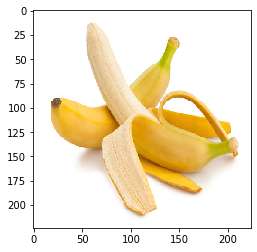

In [8]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array # 배열
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
import tensorflow as tf
tf.reset_default_graph()

filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size : {}'.format(original.size))
plt.imshow(original)
plt.show()



numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n07753592', 'banana', 0.9939275), ('n07749582', 'lemon', 0.0016046377), ('n07747607', 'orange', 0.0013446137)]]


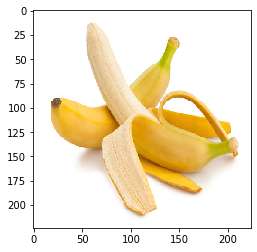

In [10]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size',numpy_image.shape)
# 차원확대 : 여러장 처리
# 1장(3차원 -> 4차원으로 확장)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size',image_batch.shape)

# prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
# Dense을 이용해서 모델을 생성
# 라벨 => 확률
resnet_model = resnet50.ResNet50(weights='imagenet')
# softmax 확률 (상위 3개로 예측)
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions, top=3) # labelling
print(label)

